##  **will They Stay in our Bank or choose an other one ? Deep Learing Approch** 

# **Kaggel Competition Notebook**

## Author: **Najeeb ullah**

- Linkedin: https://www.linkedin.com/in/najeeb-ullah-907237142/
- Github:  https://github.com/najeebjony
- Kaggel:   https://www.kaggle.com/najeebjony

## **Team Members** 

- [Najeeb ullah](https://www.linkedin.com/in/najeeb-ullah-907237142/)
- Salman 
- Noman Gahzi 
- Hoorain saba


# AIM: `We Will classifiy the customers who will stay in our bank or Leave the Bank or Leave the bank using deep learning approach.`

In [126]:
# Import Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# removw warnings
import warnings
warnings.filterwarnings("ignore")

In [127]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submission = pd.read_csv('sample_submission.csv')


In [128]:
# train dataset Exploration 
df_train.head().T

,0,1,2,3,4
id,0,1,2,3,4
CustomerId,15674932,15749177,15694510,15741417,15766172
Surname,Okwudilichukwu,Okwudiliolisa,Hsueh,Kao,Chiemenam
CreditScore,668,627,678,581,716
Geography,France,France,France,France,Spain
Gender,Male,Male,Male,Male,Male
Age,33.0,33.0,40.0,34.0,33.0
Tenure,3,1,10,2,5
Balance,0.0,0.0,0.0,148882.54,0.0
NumOfProducts,2,2,2,1,2


In [129]:
df = df_train.copy()

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [131]:
# find the null valuea in our dataset
df.isna().sum().sort_values(ascending=False)

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [132]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [133]:
df.columns 

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [134]:
cat_cols = ['Tenure', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'Exited', 'Geography', 'Gender']


num_cols = [ 'CreditScore', 'Age', 'Balance', 'EstimatedSalary'] 
       

# find the values counts of the categorical columns

for col in cat_cols:
    print(df[col].value_counts())
    print()

Tenure
2     18045
7     17810
4     17554
8     17520
5     17268
1     16760
9     16709
3     16630
6     15822
10     5909
0      5007
Name: count, dtype: int64

NumOfProducts
2    84291
1    77374
3     2894
4      475
Name: count, dtype: int64

HasCrCard
1.0    124428
0.0     40606
Name: count, dtype: int64

IsActiveMember
0.0    82885
1.0    82149
Name: count, dtype: int64

Exited
0    130113
1     34921
Name: count, dtype: int64

Geography
France     94215
Spain      36213
Germany    34606
Name: count, dtype: int64

Gender
Male      93150
Female    71884
Name: count, dtype: int64



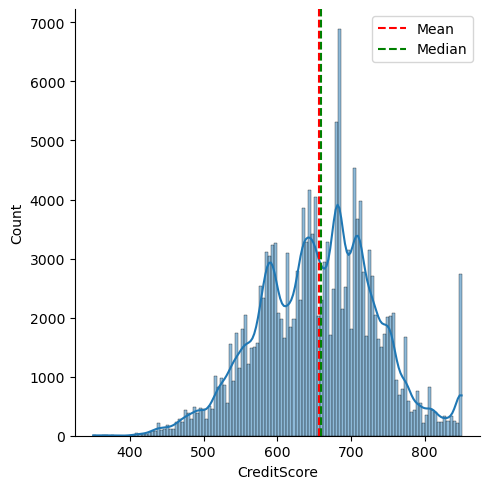

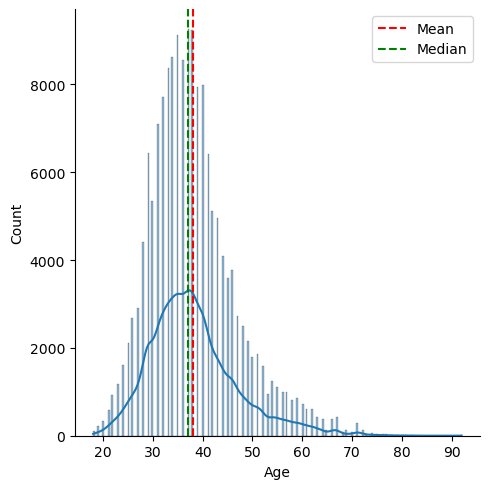

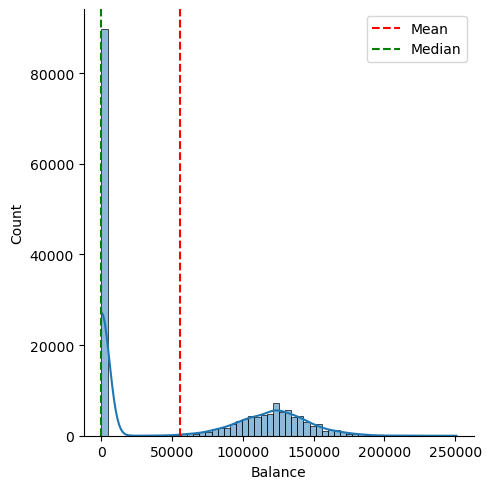

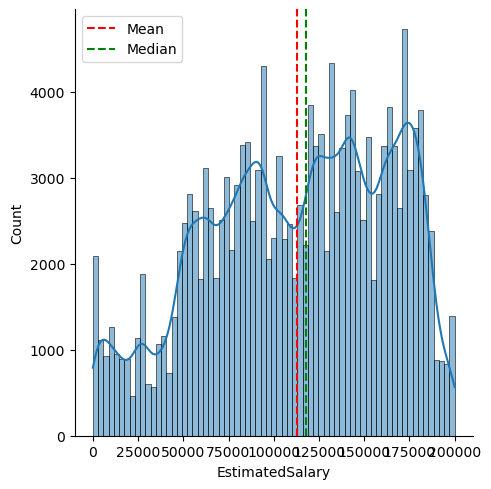

In [135]:
# create histo gram of num_col using sns and kde=True

for col in num_cols:
    sns.displot(df[col], kde=True)
    plt.axvline(df[col].mean(), color='r', linestyle='--', label='Mean')
    plt.axvline(df[col].median(), color='g', linestyle='--', label='Median')
    plt.legend()
    plt.show()

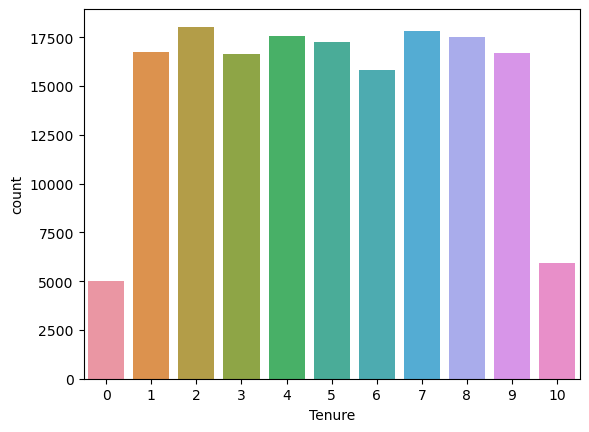

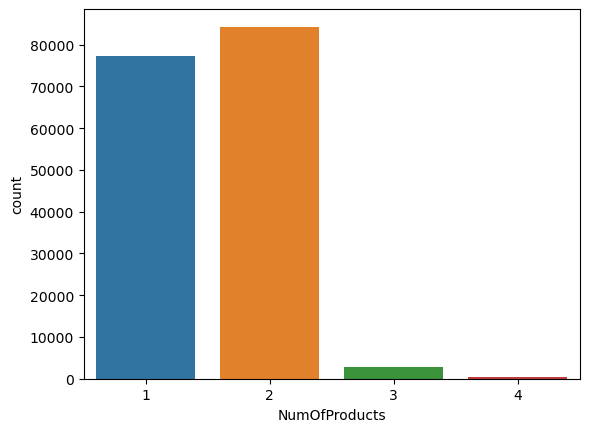

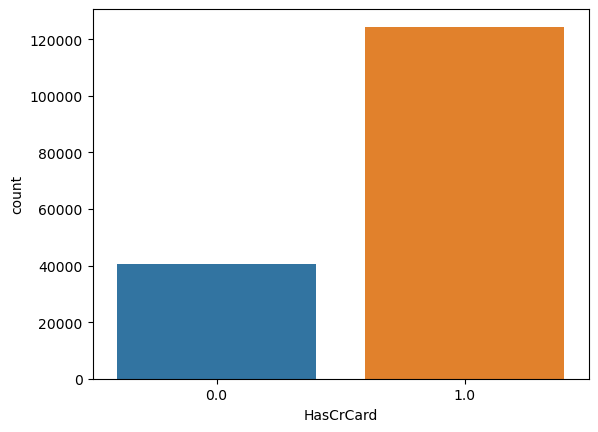

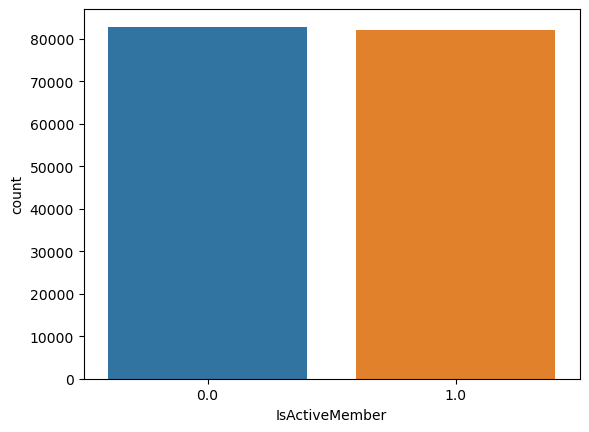

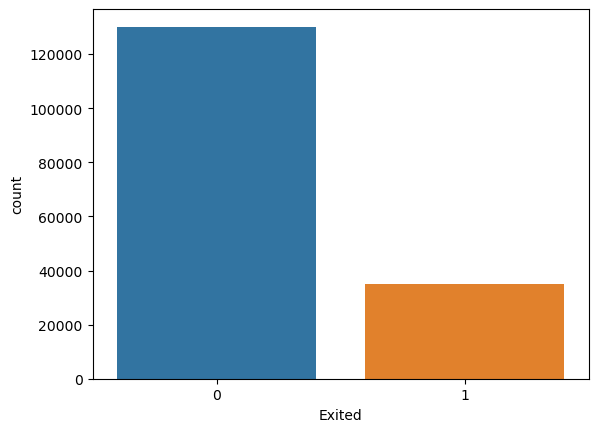

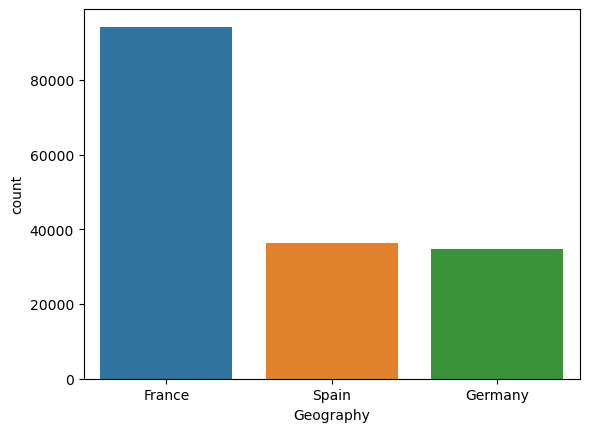

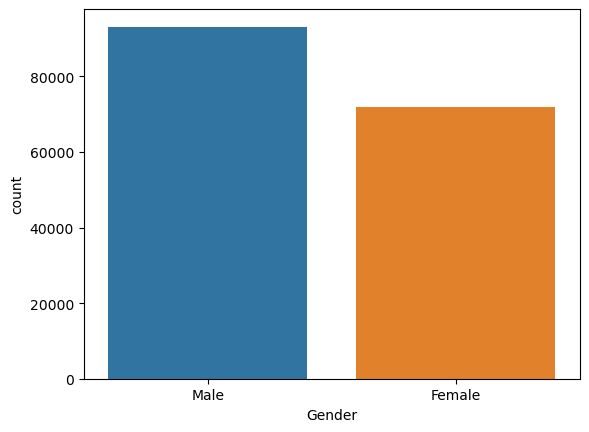

In [136]:
# create a count plot for each cat colum

for col in cat_cols:
    sns.countplot(df,x=df[col])
    plt.show()

In [138]:
df.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [145]:
# split the data into X and y 
X = df.drop(['Exited','id','CustomerId','Surname'], axis=1)
y = df['Exited']
    
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97
1,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50
2,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69
3,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88
4,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83


In [159]:
# encode on cat column using labelencoder 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['Geography'] = le.fit_transform(X['Geography'])
X['Gender'] = le.fit_transform(X['Gender'])

X.head()

# scalinh the usih  minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[num_cols] = scaler.fit_transform(X[num_cols])

X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.636,0,1,0.202703,3,0.000000,2,1.0,0.0,0.907279
1,0.554,0,1,0.202703,1,0.000000,2,1.0,1.0,0.247483
2,0.656,0,1,0.297297,10,0.000000,2,1.0,0.0,0.924364
3,0.462,0,1,0.216216,2,0.593398,1,1.0,1.0,0.422787
4,0.732,2,1,0.202703,5,0.000000,2,1.0,1.0,0.075293


In [147]:
y.value_counts()

Exited
0    130113
1     34921
Name: count, dtype: int64

In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Model Of Neural Network** (**Deep Learning**)

Epoch 1/10
4126/4126 [==============================] - 53s 11ms/step - loss: 0.3664 - accuracy: 0.8437 - val_loss: 0.3354 - val_accuracy: 0.8593
Epoch 2/10
4126/4126 [==============================] - 45s 11ms/step - loss: 0.3358 - accuracy: 0.8587 - val_loss: 0.3265 - val_accuracy: 0.8636
Epoch 3/10
4126/4126 [==============================] - 45s 11ms/step - loss: 0.3316 - accuracy: 0.8610 - val_loss: 0.3251 - val_accuracy: 0.8632
Epoch 4/10
4126/4126 [==============================] - 45s 11ms/step - loss: 0.3298 - accuracy: 0.8620 - val_loss: 0.3273 - val_accuracy: 0.8614
Epoch 5/10
4126/4126 [==============================] - 43s 10ms/step - loss: 0.3284 - accuracy: 0.8626 - val_loss: 0.3216 - val_accuracy: 0.8662
Epoch 6/10
4126/4126 [==============================] - 46s 11ms/step - loss: 0.3281 - accuracy: 0.8624 - val_loss: 0.3254 - val_accuracy: 0.8637
Epoch 7/10
4126/4126 [==============================] - 45s 11ms/step - loss: 0.3268 - accuracy: 0.8625 - val_loss: 0.3285 -

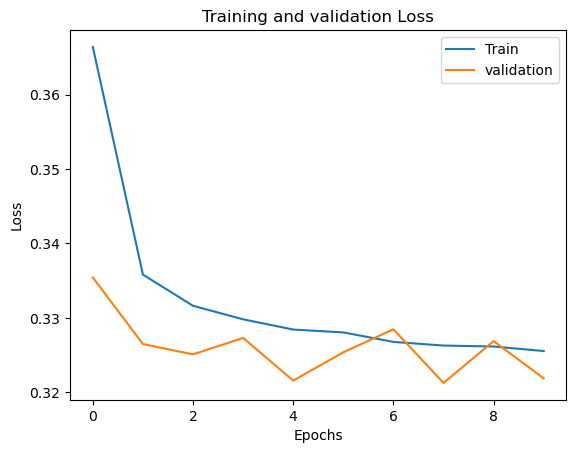

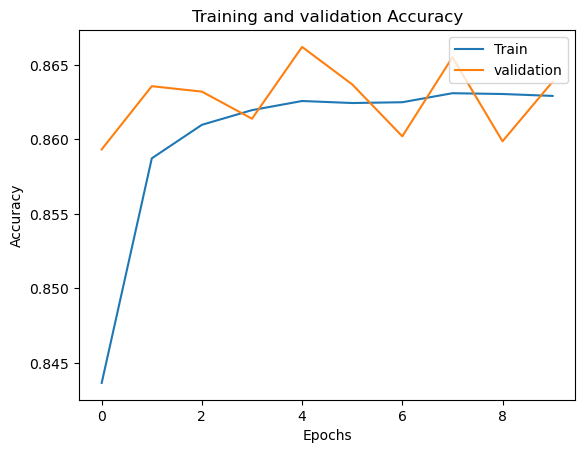

In [161]:
# create a deep neural network using Tensorflow for binary classification 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Dropout

model = Sequential(
    [
        Dense(units=128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(units=64, activation='relu'), # hidden layer 1 
        Dense(units=32, activation='relu'), # hidden Layer 2
        Dense(units=16, activation='relu'), # hidden Layer 3 
        Dense(units=8, activation='relu'),  # hidden layer 4 
        Dense(units=1, activation='sigmoid') # output layer 
    ]
)

from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(patience=15)

# compile the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# train the model and plot the training and testing loass and accuracy at each epoch
history = model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1,validation_data=(X_test,y_test),callbacks=[early_stopping])

# Evaluating the model (using Mean Squared error)
loss = model.evaluate(X_test, y_test, verbose=1)

# ploting the traning and testing loss
import matplotlib.pyplot as plt

# Plot the training and testing loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train','validation',],loc='upper right')
plt.show()

# ploting the traning and testing accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','validation',],loc='upper right')
plt.show()